## Importing the Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
# The below line suppresses any FutureWarnings i.e. warnings about changes being made in any future versions of the imported methods and attributes
warnings.simplefilter(action='ignore', category=FutureWarning)

## Style Sheet

In [81]:
plt.style.use('fivethirtyeight')

## Reading the CSV file into a pandas DataFrame

In [82]:
ipl = pd.read_csv('IPL_2023.csv')
ipl.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16


## Making the DataFrame easier to work with and cleaning the data

### Making a new 'Team Name' column

In [83]:
# Splitting the 'Player Name' and the 'Team Name' separated by a newline character
ipl['Player'] = ipl['Player'].str.split('\n')

In [84]:
# Placing the 'Team Name' and the 'Player Name' into separate columns
team = []
player = []
for i in ipl['Player']:
    player.append(i[0])
    team.append(i[1])

ipl['Player'] = player
ipl.insert(2, 'Team', team)

In [85]:
ipl.head()

,POS,Player,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis,RCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill,GT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli,RCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal,RR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway,CSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16


### Renaming existing columns

In [86]:
ipl.columns

Index(['POS', 'Player', 'Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF',
       'SR', '100', '50', '4s', '6s'],
      dtype='object')

In [87]:
new_columns = {'POS':'Position',
               'Mat':'Matches',
               'Inns':'Innings',
               'NO':'Not Outs',
               'HS':'Highest Score',
               'Avg':'Average',
               'BF':'Balls Faced',
               'SR':'Strike Rate',
               '100':'100s',
               '50':'50s'}
ipl.rename(columns=new_columns, inplace=True)
ipl.columns

Index(['Position', 'Player', 'Team', 'Matches', 'Innings', 'Not Outs', 'Runs',
       'Highest Score', 'Average', 'Balls Faced', 'Strike Rate', '100s', '50s',
       '4s', '6s'],
      dtype='object')

In [88]:
ipl.head()

,Position,Player,Team,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,4s,6s
0,1,Faf Du Plessis,RCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill,GT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli,RCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal,RR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway,CSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16


### Handling the missing values

In [89]:
# Checking for null values (did not find any)
ipl.isna().sum()

Position         0
Player           0
Team             0
Matches          0
Innings          0
Not Outs         0
Runs             0
Highest Score    0
Average          0
Balls Faced      0
Strike Rate      0
100s             0
50s              0
4s               0
6s               0
dtype: int64

#### The 'Average' column has some values missing (more specifically players who have never been dismissed). For them the average runs scored is taken to be the total runs scored by the player

In [90]:
ipl['Average'].unique()

array(['56.15', '56.67', '53.25', '48.08', '53.18', '36.86', '42.58',
       '42.00', '59.25', '49.78', '31.36', '31.77', '28.86', '33.33',
       '28.00', '38.50', '54.43', '41.44', '30.67', '30.17', '30.08',
       '32.55', '25.57', '22.36', '23.77', '37.50', '28.90', '41.00',
       '22.08', '35.63', '28.30', '35.25', '34.88', '27.60', '45.67',
       '34.25', '22.75', '27.00', '26.10', '36.43', '22.55', '26.33',
       '20.64', '20.55', '44.60', '27.25', '30.86', '30.57', '29.86',
       '21.11', '26.57', '20.00', '42.25', '17.78', '22.29', '21.86',
       '21.71', '35.75', '11.67', '27.80', '16.88', '14.22', '15.25',
       '19.50', '16.43', '19.00', '14.13', '13.75', '13.25', '26.25',
       '51.50', '47.50', '30.33', '45.00', '14.83', '13.00', '25.67',
       '23.67', '69.00', '6.90', '11.17', '13.20', '15.00', '19.67',
       '29.00', '8.67', '16.33', '10.50', '14.00', '7.80', '12.33',
       '8.75', '-', '16.50', '8.25', '16.00', '15.50', '25.00', '12.50',
       '23.00', '11.

In [91]:
# Creating a copy of the DataFrame 'IPL'
a = ipl[ipl['Average'] == '-']
a.head()

,Position,Player,Team,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,4s,6s
96,97,David Willey,RCB,4,3,3,35,20*,-,32,109.37,0,0,4,0
108,109,Mayank Markande,SRH,10,3,3,21,18*,-,13,161.53,0,0,2,1
117,118,Akeal Hosein,SRH,1,1,1,16,16*,-,10,160.00,0,0,1,1
126,127,Kedar Jadhav,RCB,2,1,1,12,12*,-,10,120.00,0,0,1,0
136,137,Mukesh Kumar,DC,10,3,3,7,6*,-,9,77.77,0,0,0,0


In [92]:
for i in a.index:
    ipl.iloc[i, 8] = str(ipl.iloc[i]['Runs'])

In [93]:
ipl['Average'].unique()

array(['56.15', '56.67', '53.25', '48.08', '53.18', '36.86', '42.58',
       '42.00', '59.25', '49.78', '31.36', '31.77', '28.86', '33.33',
       '28.00', '38.50', '54.43', '41.44', '30.67', '30.17', '30.08',
       '32.55', '25.57', '22.36', '23.77', '37.50', '28.90', '41.00',
       '22.08', '35.63', '28.30', '35.25', '34.88', '27.60', '45.67',
       '34.25', '22.75', '27.00', '26.10', '36.43', '22.55', '26.33',
       '20.64', '20.55', '44.60', '27.25', '30.86', '30.57', '29.86',
       '21.11', '26.57', '20.00', '42.25', '17.78', '22.29', '21.86',
       '21.71', '35.75', '11.67', '27.80', '16.88', '14.22', '15.25',
       '19.50', '16.43', '19.00', '14.13', '13.75', '13.25', '26.25',
       '51.50', '47.50', '30.33', '45.00', '14.83', '13.00', '25.67',
       '23.67', '69.00', '6.90', '11.17', '13.20', '15.00', '19.67',
       '29.00', '8.67', '16.33', '10.50', '14.00', '7.80', '12.33',
       '8.75', '35', '16.50', '8.25', '16.00', '15.50', '25.00', '12.50',
       '23.00', '11

#### Some entries in the 'Highest Score' column have an asterisk(*) in them. Removing them is necessary for type conversion

In [94]:
# Creating a copy of the 'IPL' DataFrame
b = []
for i in ipl.index:
    b.append('*' in ipl.iloc[i]['Highest Score'])
print(b)

# Removing the asterisk from the 'Highest Score' column
for i in ipl.index:
    if (b[i]):
        ipl.iloc[i,7] = ipl.iloc[i,7].replace('*','')

ipl.head()

[False, True, True, False, True, False, True, False, True, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, True, True, False, True, False, False, False, True, False, False, True, False, True, False, False, False, False, True, False, False, False, True, False, True, False, True, True, False, True, True, False, True, True, True, False, False, False, True, False, True, False, False, False, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, True, True, False, True, True, False, False, True, False, False, True, True, False, False, True, True, True, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, True, True, False, True, False, False, True, False, True, True, False, True, True, True, False, True, True

,Position,Player,Team,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,4s,6s
0,1,Faf Du Plessis,RCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill,GT,14,14,2,680,104,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli,RCB,14,14,2,639,101,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal,RR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway,CSK,14,13,2,585,92,53.18,422,138.62,0,6,69,16


### Converting the datatypes of certain columns

In [95]:
ipl.dtypes

Position           int64
Player            object
Team              object
Matches            int64
Innings            int64
Not Outs           int64
Runs               int64
Highest Score     object
Average           object
Balls Faced        int64
Strike Rate      float64
100s               int64
50s                int64
4s                 int64
6s                 int64
dtype: object

In [96]:
ipl['Average'] = ipl['Average'].astype('float64')

In [97]:
ipl['Highest Score'] = ipl['Highest Score'].astype('int64')

In [98]:
ipl.dtypes

Position           int64
Player            object
Team              object
Matches            int64
Innings            int64
Not Outs           int64
Runs               int64
Highest Score      int64
Average          float64
Balls Faced        int64
Strike Rate      float64
100s               int64
50s                int64
4s                 int64
6s                 int64
dtype: object

## Exploratory Data Analysis (EDA) for Feature Selection

In [99]:
ipl.head()

,Position,Player,Team,Matches,Innings,Not Outs,Runs,Highest Score,Average,Balls Faced,Strike Rate,100s,50s,4s,6s
0,1,Faf Du Plessis,RCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill,GT,14,14,2,680,104,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli,RCB,14,14,2,639,101,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal,RR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway,CSK,14,13,2,585,92,53.18,422,138.62,0,6,69,16


#### The most visually relevant features are plotted with red

Text(0, 0.5, '6s')

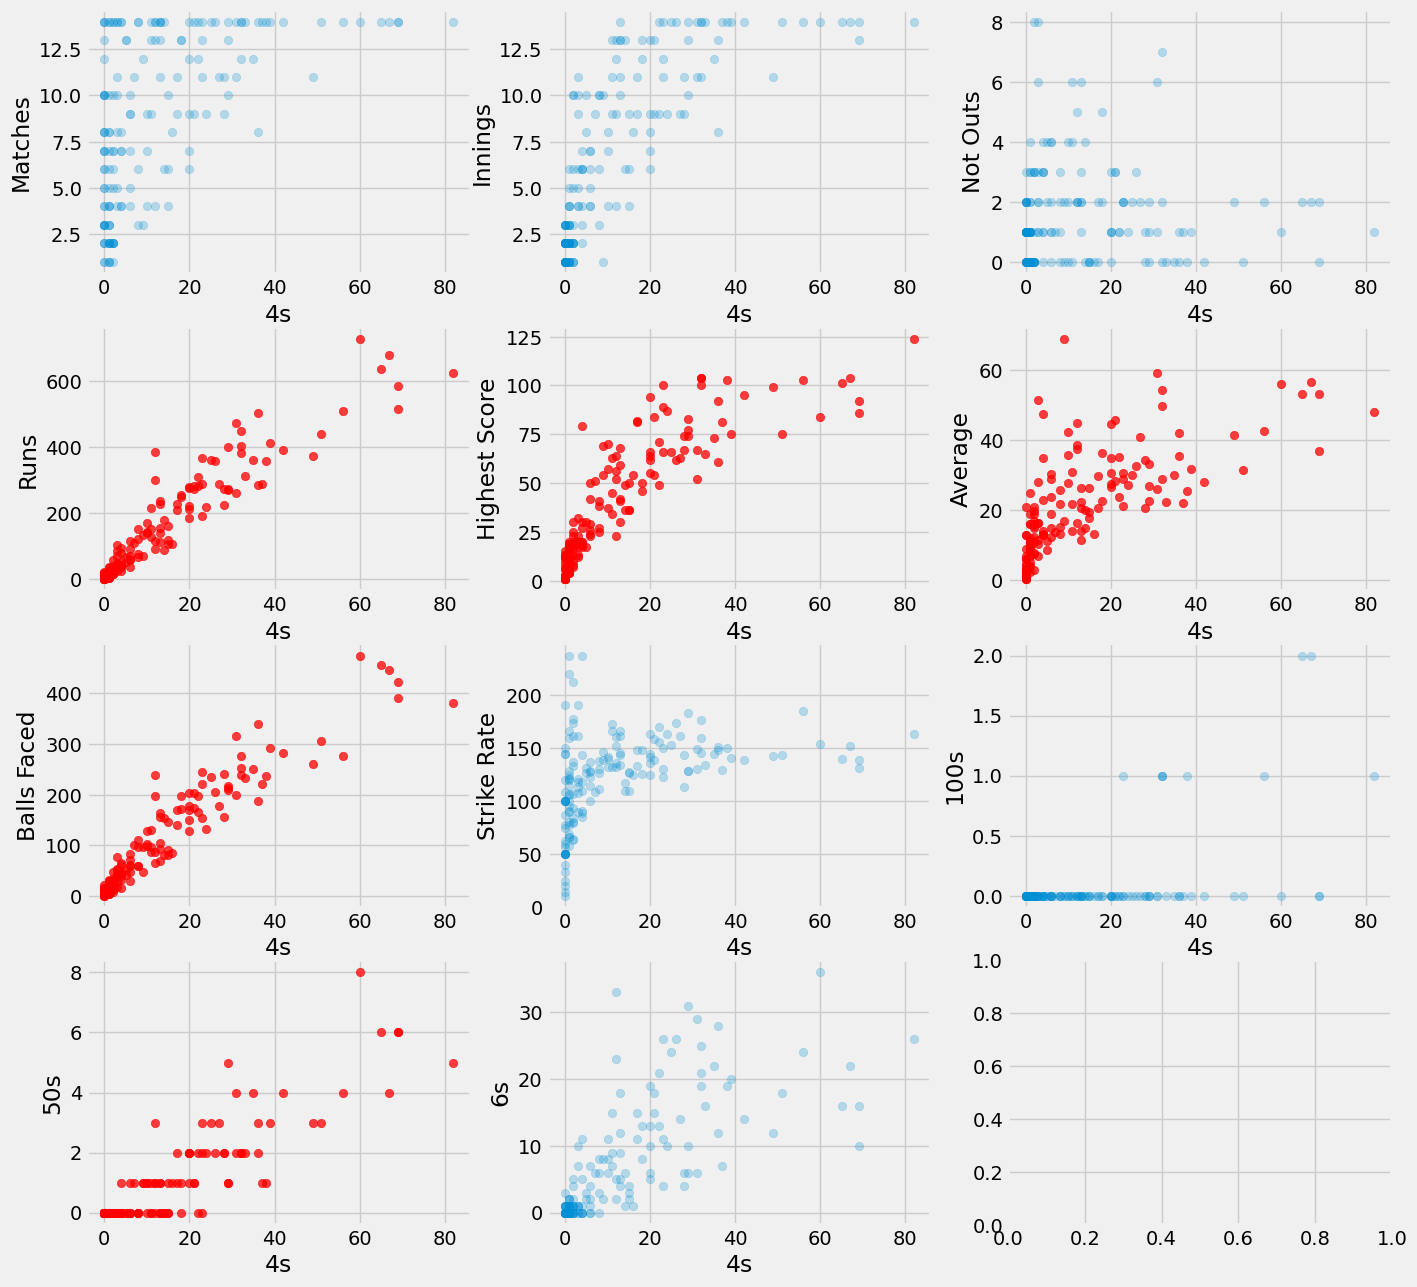

In [100]:
fig, ax = plt.subplots(4,3, figsize=(15,15))

ax[0,0].scatter(ipl['4s'], ipl['Matches'], alpha=0.25)
ax[0,0].set_xlabel('4s')
ax[0,0].set_ylabel('Matches')

ax[0,1].scatter(ipl['4s'], ipl['Innings'], alpha=0.25)
ax[0,1].set_xlabel('4s')
ax[0,1].set_ylabel('Innings')

ax[0,2].scatter(ipl['4s'], ipl['Not Outs'], alpha=0.25)
ax[0,2].set_xlabel('4s')
ax[0,2].set_ylabel('Not Outs')

ax[1,0].scatter(ipl['4s'], ipl['Runs'], color='red', alpha=0.75)
ax[1,0].set_xlabel('4s')
ax[1,0].set_ylabel('Runs')

ax[1,1].scatter(ipl['4s'], ipl['Highest Score'], color='red', alpha=0.75)
ax[1,1].set_xlabel('4s')
ax[1,1].set_ylabel('Highest Score')

ax[1,2].scatter(ipl['4s'], ipl['Average'], color='red', alpha=0.75)
ax[1,2].set_xlabel('4s')
ax[1,2].set_ylabel('Average')

ax[2,0].scatter(ipl['4s'], ipl['Balls Faced'], color='red', alpha=0.75)
ax[2,0].set_xlabel('4s')
ax[2,0].set_ylabel('Balls Faced')

ax[2,1].scatter(ipl['4s'], ipl['Strike Rate'], alpha=0.25)
ax[2,1].set_xlabel('4s')
ax[2,1].set_ylabel('Strike Rate')

ax[2,2].scatter(ipl['4s'], ipl['100s'], alpha=0.25)
ax[2,2].set_xlabel('4s')
ax[2,2].set_ylabel('100s')

ax[3,0].scatter(ipl['4s'], ipl['50s'], color='red', alpha=0.75)
ax[3,0].set_xlabel('4s')
ax[3,0].set_ylabel('50s')

ax[3,1].scatter(ipl['4s'], ipl['6s'], alpha=0.25)
ax[3,1].set_xlabel('4s')
ax[3,1].set_ylabel('6s')

#### Plotting the correlation matrix

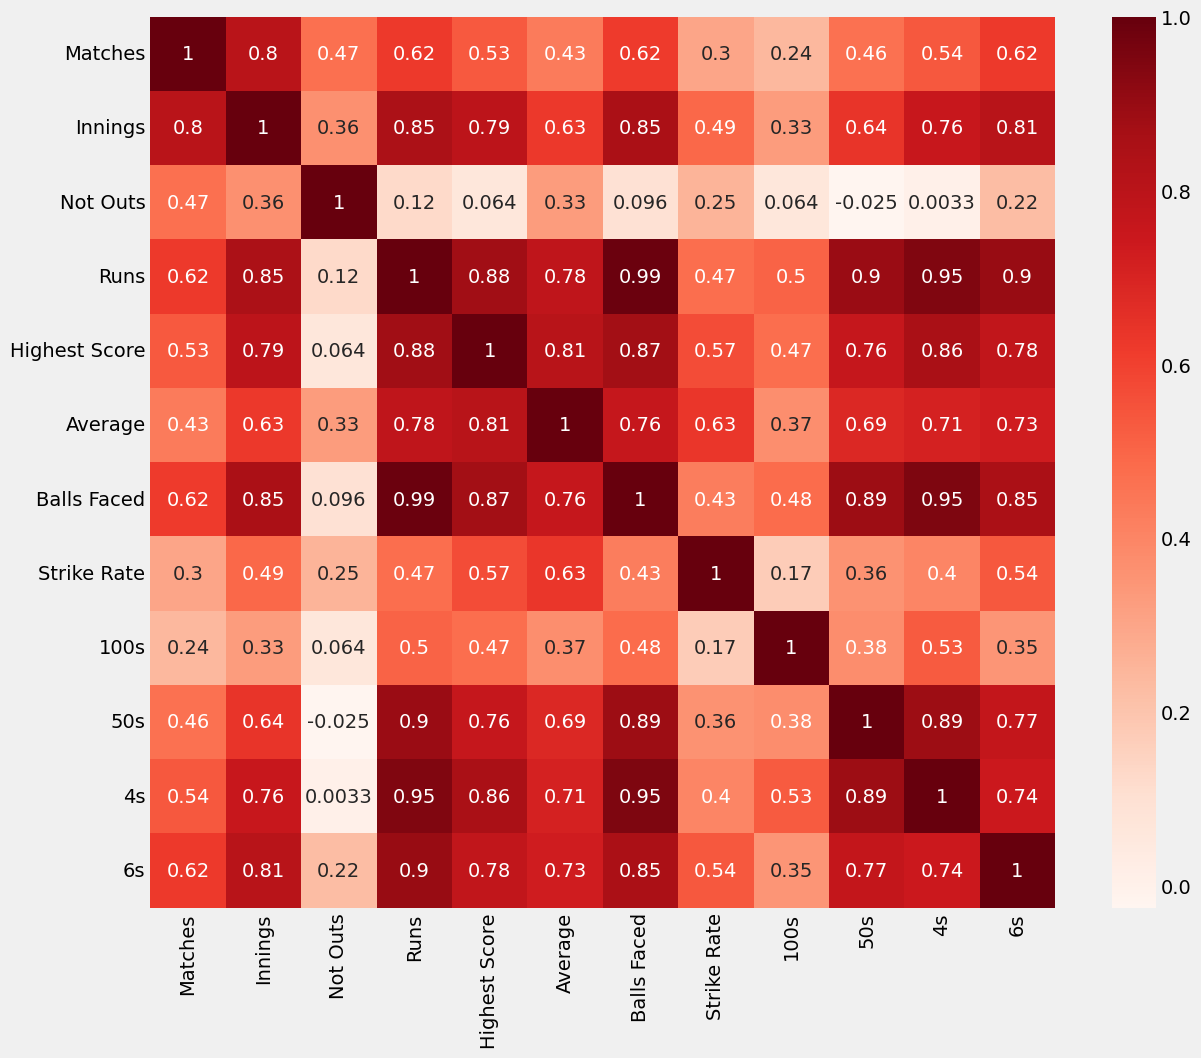

In [101]:
plt.figure(figsize=(13,11))
corr = ipl.iloc[:,3:].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

#### List of the most correlated features

In [102]:
corr_4s = corr["4s"].sort_values(ascending=False)
print(corr_4s)

4s               1.000000
Balls Faced      0.949104
Runs             0.946171
50s              0.886954
Highest Score    0.855627
Innings          0.759598
6s               0.739856
Average          0.710341
Matches          0.536266
100s             0.527596
Strike Rate      0.400501
Not Outs         0.003277
Name: 4s, dtype: float64


#### We will choose 'Balls Faced', '50s' and the 'Highest Score' as the features for the regression to predict the number of 4s. 'Runs', even though is highly correlated to the number of 4s, is also highly correlated to the number of balls faced and hence choosing one of 'Balls Faced' or 'Runs' will suffice

## Regression Models for predicting the number of 4s

### Feature selection using sklearn

In [103]:
# Making a copy of the original DataFrame
target = ipl.iloc[:,13] # The target Selected - Number of 4s
features = ipl.iloc[:,[3,4,5,6,7,8,9,10,11,12,14]] # The features for selection

In [104]:
# Finding out the number of features ideal for regression
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# Number of features
nof_list=np.arange(1,11)
high_score=0
# Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.947471


In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Selecting the regressor model
RFE_regressor = LinearRegression()

#Initializing RFE model
rfe = RFE(RFE_regressor, n_features_to_select=10)

#Transforming data using RFE
X_rfe = rfe.fit_transform(features, target)  

#Fitting the data to model
RFE_regressor.fit(features, target)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True False  True  True  True]
[1 1 1 1 1 1 1 2 1 1 1]


### Multiple Linear Regression

In [106]:
# Initialising the data into X and y
X = ipl.iloc[:,[3,4,5,6,7,8,9,11,12,14]] # Independent Variable - Features Selected
y = ipl.iloc[:,13] # Dependent Variable - Target Selected

In [107]:
# Separating the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
# There are three steps to model something with sklearn
from sklearn.linear_model import LinearRegression

# 1. Set up the model
model = LinearRegression()

# 2. Use fit
model.fit(X_train, y_train)

# 3. Check the score
print('The score for the multiple linear regression is: ', model.score(X_test, y_test))

The score for the multiple linear regression is:  0.9474709210803574


In [109]:
coef = model.coef_
intercept = model.intercept_

print('The coefficients for the model is: ', coef)
print('The y-intercept for the model is: ', intercept) 

The coefficients for the model is:  [ 0.04661399  0.11848957 -0.36490008  0.24985523  0.05605575 -0.04262012
 -0.15482061 -1.88944335  1.17512451 -1.49701758]
The y-intercept for the model is:  -0.10271195632450869


In [110]:
print('Thus, the equation we get is: ')
print('(Number of 4s) = ', f'{coef[0]:0.3f}', '*(Matches) + ', f'{coef[1]:0.3f}', '*(Innings) + ', f'{coef[2]:0.3f}', '*(Not Outs)'
                         , f'{coef[3]:0.3f}', '*(Runs) + ', f'{coef[4]:0.3f}', '*(Highest Score) + ', f'{coef[5]:0.3f}', '*(Average) + '
                         , f'{coef[6]:0.3f}', '*(Balls Faced) + ', f'{coef[7]:0.3f}', '*(100s) + ', f'{coef[8]:0.3f}', '*(50s) + '
                         , f'{coef[9]:0.3f}', '*(6s) + ', f'{intercept:0.3f}', sep='')

Thus, the equation we get is: 
(Number of 4s) = 0.047*(Matches) + 0.118*(Innings) + -0.365*(Not Outs)0.250*(Runs) + 0.056*(Highest Score) + -0.043*(Average) + -0.155*(Balls Faced) + -1.889*(100s) + 1.175*(50s) + -1.497*(6s) + -0.103


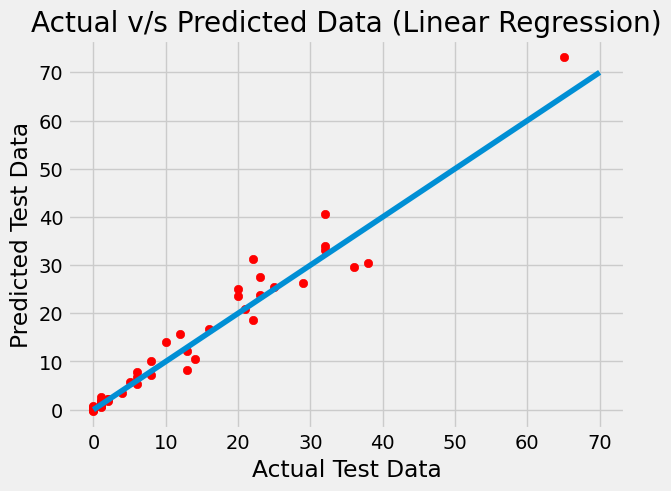

In [111]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Actual v/s Predicted Data (Linear Regression)')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 70, 100)
y = x
plt.plot(x, y)
plt.show()

In [112]:
# Mean Squared Error for the train and the test data
y_train_pred_MLR = model.predict(X_train)
y_test_pred_MLR = model.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
print('MSE for the training data is: ', MSE(y_train, y_train_pred_MLR))
print('MSE for the testing data is: ', MSE(y_test, y_test_pred_MLR))

MSE for the training data is:  7.2699952325817785
MSE for the testing data is:  10.003103091127377


### Decision Tree Regression

In [113]:
# Initialising the data into X and y
X = ipl.iloc[:,[3,4,5,6,7,8,9,11,12,14]] # Independent Variable - Features Selected
y = ipl.iloc[:,13] # Dependent Variable - Target Selected

In [114]:
# Separating the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
# There are three steps to model something with sklearn
from sklearn.tree import DecisionTreeRegressor

# 1. Set up the model
model = DecisionTreeRegressor()

# 2. Use fit
model.fit(X_train, y_train)

# 3. Check the score
print('The score for the decision tree regression is: ', model.score(X_test, y_test))

The score for the decision tree regression is:  0.8573581323733329


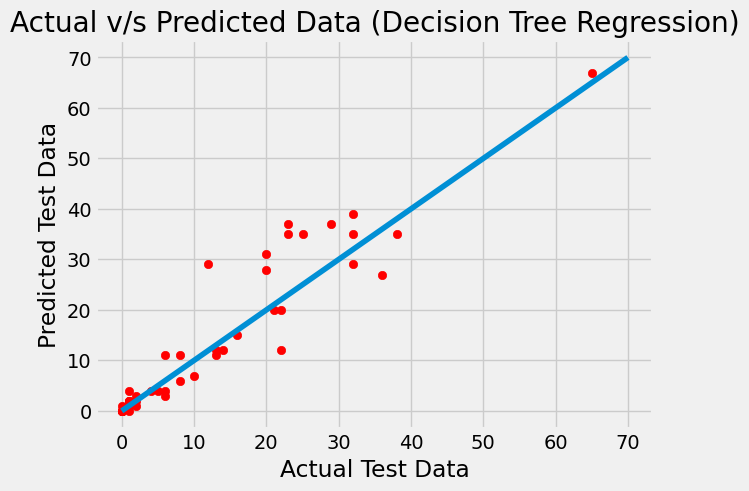

In [116]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Actual v/s Predicted Data (Decision Tree Regression)')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 70, 100)
y = x
plt.plot(x, y)
plt.show()

In [117]:
# Mean Squared Error for the train and the test data
y_train_pred_DTR = model.predict(X_train)
y_test_pred_DTR = model.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
print('MSE for the training data is: ', MSE(y_train, y_train_pred_DTR))
print('MSE for the testing data is: ', MSE(y_test, y_test_pred_DTR))

MSE for the training data is:  0.0
MSE for the testing data is:  27.163265306122447


### K-Neighbours Regression

In [118]:
# Initialising the data into X and y
X = ipl.iloc[:,[3,4,5,6,7,8,9,11,12,14]] # Independent Variable - Features Selected
y = ipl.iloc[:,13] # Dependent Variable - Target Selected

In [119]:
# Separating the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
from sklearn.neighbors import KNeighborsRegressor

# Finding out the best possible value of K for the model
error = 1000 # An arbitrarily high value of MSE
k_max = 0

for k in range(1,100):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    if (MSE(y_test, y_test_pred) < error):
        k_max = k
        error = MSE(y_test, y_test_pred)

print(print('The MSE for the k-neighbours regressor is: ', error))
print(k_max)

The MSE for the k-neighbours regressor is:  25.514068349233185
None
13


In [121]:
# 1. Set up the model
model = KNeighborsRegressor(n_neighbors=k_max)

# 2. Use fit
model.fit(X_train, y_train)

# 3. Check the score
print('The score for the K-Neighbours regression is: ', model.score(X_test, y_test))

The score for the K-Neighbours regression is:  0.8660185246849258


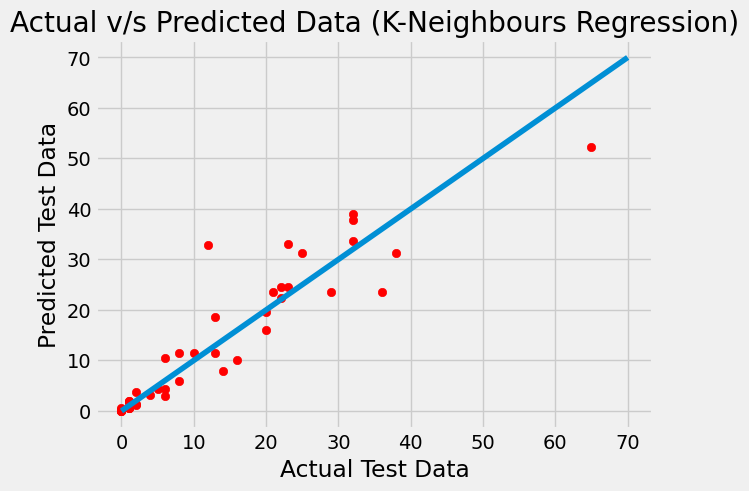

In [122]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Actual v/s Predicted Data (K-Neighbours Regression)')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 70, 100)
y = x
plt.plot(x, y)
plt.show()

In [123]:
# Mean Squared Error for the train and the test data
y_train_pred_KNR = model.predict(X_train)
y_test_pred_KNR = model.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
print('MSE for the training data is: ', MSE(y_train, y_train_pred_KNR))
print('MSE for the testing data is: ', MSE(y_test, y_test_pred_KNR))

MSE for the training data is:  32.25993979030416
MSE for the testing data is:  25.514068349233185


### Random Forest Regression

In [124]:
# Initialising the data into X and y
X = ipl.iloc[:,[3,4,5,6,7,8,9,11,12,14]] # Independent Variable - Features Selected
y = ipl.iloc[:,13] # Dependent Variable - Target Selected

In [125]:
# Separating the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
# There are three steps to model something with sklearn
from sklearn.ensemble import RandomForestRegressor

# 1. Set up the model
model = RandomForestRegressor()

# 2. Use fit
model.fit(X_train, y_train)

# 3. Check the score
print('The score for the random forest regression is: ', model.score(X_test, y_test))

The score for the random forest regression is:  0.8661012000734873


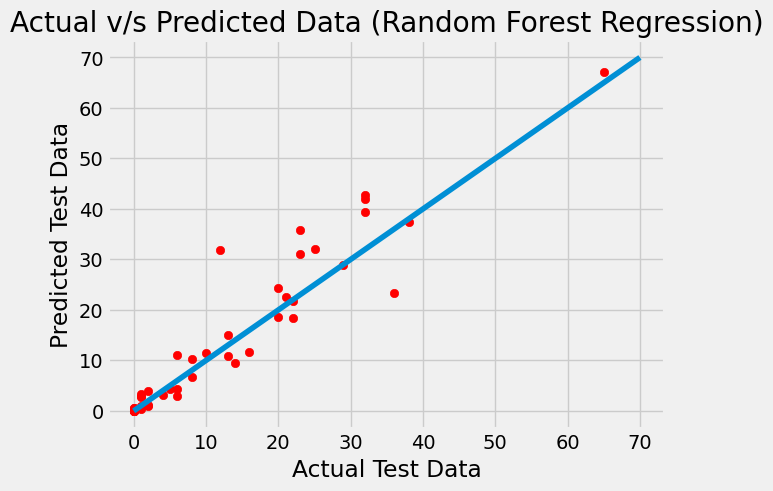

In [127]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Actual v/s Predicted Data (Random Forest Regression)')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 70, 100)
y = x
plt.plot(x, y)
plt.show()

In [128]:
# Mean Squared Error for the train and the test data
y_train_pred_RFR = model.predict(X_train)
y_test_pred_RFR = model.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
print('MSE for the training data is: ', MSE(y_train, y_train_pred_RFR))
print('MSE for the testing data is: ', MSE(y_test, y_test_pred_RFR))

MSE for the training data is:  3.4245377192982454
MSE for the testing data is:  25.498324489795916


### Polynomial Regression

In [129]:
# Adding a new column to the DataFrame
ipl['Highest Score ^1.5'] = ipl['Highest Score'] ** 1.5
target = ipl.iloc[:,13]
features = ipl.iloc[:,[3,4,5,6,7,8,9,10,11,12,14,15]]

#### Visual representation of choosing Highest Score^1.5 as an additional feature

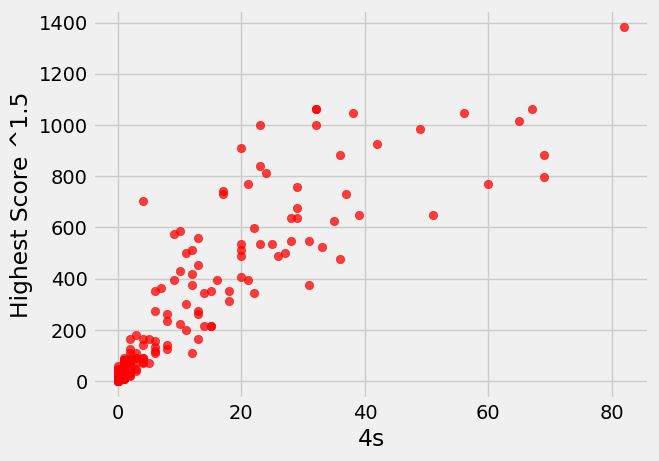

In [130]:
# This new parameter is more linearised with the number of 4s
plt.scatter(ipl['4s'], ipl['Highest Score ^1.5'], color='red', alpha=0.75)
plt.xlabel('4s')
plt.ylabel('Highest Score ^1.5')
plt.show()

In [131]:
# Selecting the number of features to use
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
# Number of features
nof_list=np.arange(1,12)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.951510


In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Selecting the regression model
RFE_regressor = LinearRegression()

#Initializing RFE model
rfe = RFE(RFE_regressor, n_features_to_select=11)# random number(2)

#Transforming data using RFE
X_rfe = rfe.fit_transform(features, target)  

#Fitting the data to model
RFE_regressor.fit(features, target)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True False  True  True  True  True]
[1 1 1 1 1 1 1 2 1 1 1 1]


In [133]:
# Initialising the data into X and y
X = ipl.iloc[:,[3,4,5,6,7,8,9,11,12,14,15]] # Independent Variable - Features Selected
y = ipl.iloc[:,13] # Dependent Variable - Target Selected

In [134]:
# Separating the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
# There are three steps to model something with sklearn
from sklearn.linear_model import LinearRegression

# 1. Set up the model
model = LinearRegression()

# 2. Use fit
model.fit(X_train, y_train)

# 3. Check the score
print('The score for the polynomial regression is: ', model.score(X_test, y_test))

The score for the polynomial regression is:  0.9514640433372945


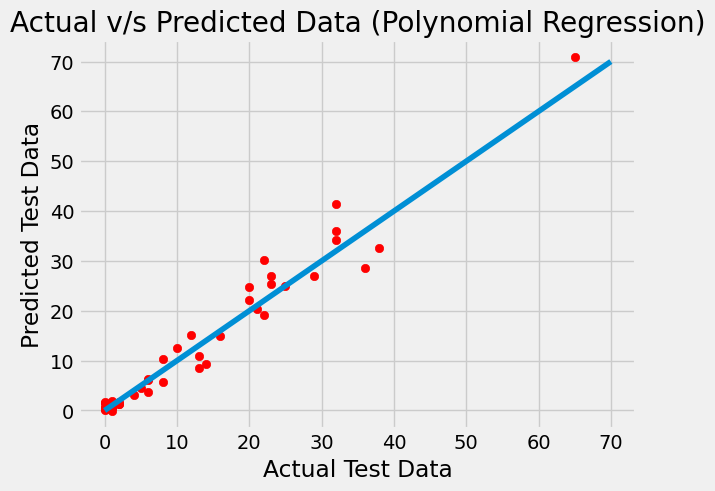

In [136]:
# plot prediction and actual data
y_pred = model.predict(X_test) 
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Actual v/s Predicted Data (Polynomial Regression)')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 70, 100)
y = x
plt.plot(x, y)
plt.show()

In [137]:
# Mean Squared Error for the train and the test data
y_train_pred_PR = model.predict(X_train)
y_test_pred_PR = model.predict(X_test)

from sklearn.metrics import mean_squared_error as MSE
print('MSE for the training data is: ', MSE(y_train, y_train_pred_PR))
print('MSE for the testing data is: ', MSE(y_test, y_test_pred_PR))

MSE for the training data is:  6.2510474896732555
MSE for the testing data is:  9.24269353487527


## Conclusions

### Mean Squared Errors for the training data for different regression models

In [138]:
print('Multiple Linear Regression : ', MSE(y_train, y_train_pred_MLR))
print('Decision Tree Regression   : ', MSE(y_train, y_train_pred_DTR))
print('K-Neighbours Regression    : ', MSE(y_train, y_train_pred_KNR))
print('Random Forest Regression   : ', MSE(y_train, y_train_pred_RFR))
print('Polynomial Regression      : ', MSE(y_train, y_train_pred_PR))

Multiple Linear Regression :  7.2699952325817785
Decision Tree Regression   :  0.0
K-Neighbours Regression    :  32.25993979030416
Random Forest Regression   :  3.4245377192982454
Polynomial Regression      :  6.2510474896732555


### Mean Squared Errors for the testing data for different regression models

In [139]:
print('Multiple Linear Regression : ', MSE(y_test, y_test_pred_MLR))
print('Decision Tree Regression   : ', MSE(y_test, y_test_pred_DTR))
print('K-Neighbours Regression    : ', MSE(y_test, y_test_pred_KNR))
print('Random Forest Regression   : ', MSE(y_test, y_test_pred_RFR))
print('Polynomial Regression      : ', MSE(y_test, y_test_pred_PR))

Multiple Linear Regression :  10.003103091127377
Decision Tree Regression   :  27.163265306122447
K-Neighbours Regression    :  25.514068349233185
Random Forest Regression   :  25.498324489795916
Polynomial Regression      :  9.24269353487527


## For Training Data, MSE is least for DECISION TREE REGRESSION model
## For Testing Data, MSE is least for POLYNOMIAL REGRESSION model